In [125]:
# Thanks to Leon for mentioning that there are duplicates in this data set.
# --UCI ML Librarian

# row 84 and 86:   94,58,21,18,26,2.0,2
# row 141 and 318:   92,80,10,26,20,6.0,1
# row 143 and 150:   91,63,25,26,15,6.0,1
# row 170 and 176:   97,71,29,22,52,8.0,1

import numpy as np
import pandas as pd
from colorama import Back, Fore, Style
import time
from sklearn import metrics
import sklearn.metrics as sm
import matplotlib.pyplot as plt
from sklearn import manifold
import pyclustering as pyclus
import numpy as np
from sklearn.datasets.samples_generator import make_blobs
from sklearn.neighbors import NearestNeighbors['.']
from sklearn.cluster import DBSCAN
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

In [135]:
# missing_value=['?']
data= pd.read_csv("bupa.csv", encoding='latin1' )
print(data.isnull().sum())
print(data.shape)
data.dropna(inplace=True)
print(data.shape)
X=data.iloc[:,1:]
colors = np.array(['g', 'r', 'b', 'c', 'k', 'y','royalblue', 'maroon', 'forestgreen',
                   'mediumorchid', 'tan', 'deeppink', 'olive', 'goldenrod', 'lightcyan', 'navy'])
# b : blue.
# g : green.
# r : red.
# c : cyan.
# m : magenta.
# y : yellow.
# k : black.
# w : white.
len(X.values[:,0])

mcv         0
alkphos     0
sgpt        0
sgot        0
gammagt     0
drinks      0
selector    0
dtype: int64
(345, 7)
(345, 7)


345

In [127]:
# data

In [136]:
'''Clustering algorithm for
large-scale data
K-means
BIRCH
CLARA
CURE
DBSCAN'''

#### kmeans algorithm
from sklearn.cluster import KMeans
start = time.time()
kmean = KMeans(n_clusters=4, max_iter=500)
kmean.fit(X)
end = time.time()
print(Fore.BLUE + "k-mean algorithm time is :", end - start)
print(Fore.RESET)

labels = kmean.labels_
KMeans_Sil = metrics.silhouette_score(X, labels, metric='euclidean')
print(KMeans_Sil)
data['Kmeans_labels'] = kmean.labels_
# data
len(kmean.labels_)

k-mean algorithm time is : 0.10093855857849121

0.35082678434165787


345

In [130]:
centroids = kmean.cluster_centers_
labels = kmean.labels_
print(labels)

[0 3 3 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3 0 0 3 3 3 3 1 3 3 3 0 3 3 3 0 0 3 1 3
 3 0 3 0 3 0 0 3 3 3 3 3 3 3 3 1 3 3 3 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 0 2 3 3 0 0 3 0 3 2 3 3 3 3 3 3 3 3 3 3 3 3 1 3 3 3 1 3 0 0 3 0 0 3 0 3
 0 3 3 2 3 3 3 0 3 3 0 0 3 0 3 0 1 3 3 3 3 1 2 3 3 3 3 1 3 3 3 3 3 3 0 0 1
 3 3 1 0 3 3 1 1 1 0 0 3 0 3 3 0 3 3 1 1 1 0 0 1 3 0 1 0 1 3 2 3 1 1 0 3 1
 1 1 0 1 2 3 3 0 0 3 0 3 3 3 0 3 3 0 0 1 0 3 0 0 3 0 3 0 0 3 0 3 0 3 0 0 3
 3 3 3 3 0 1 0 1 3 3 2 0 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 0 1 3 3 0 3 3 3 3
 3 1 0 3 3 1 0 3 0 3 3 3 3 3 3 3 3 1 1 3 3 3 3 3 3 3 0 3 3 0 3 3 3 3 1 0 3
 3 0 3 2 3 3 3 3 0 3 1 3 3 0 1 1 3 3 3 2 1 3 0 0 0 3 2 3 3 3 0 3 0 3 2 0 0
 1 0 3 0 0 0 1 0 2 1 3 1]


In [131]:
# cluster0 = data.iloc[labels==0, 3]
# print('cluster 0: \n', cluster0.value_counts())

# print('*' * 50)

# cluster1 = data.iloc[labels==1, 3]
# print('cluster 1: \n', cluster1.value_counts())

# print('*' * 50)

# cluster2 = data.iloc[labels==2, 3]
# print('cluster 2: \n', cluster2.value_counts())

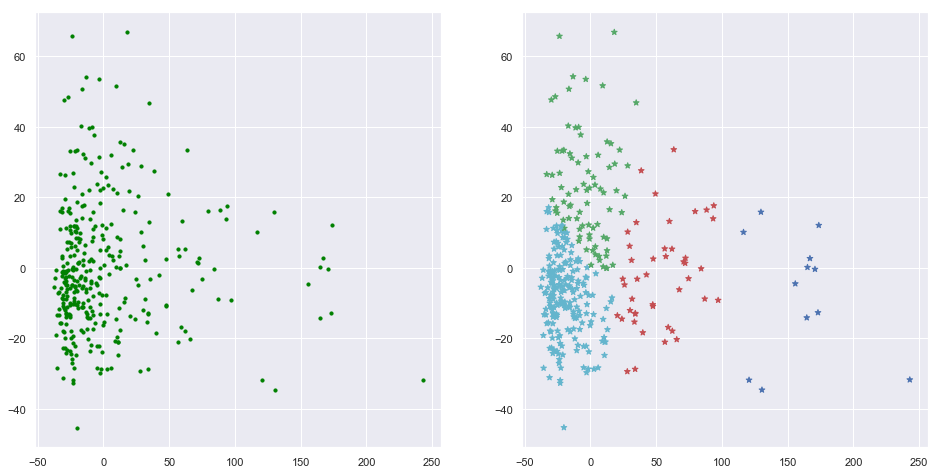

In [132]:
########## PCA of features for Kmeans
from sklearn.decomposition import PCA
pca_model = PCA(n_components=2)
X_PCA = pca_model.fit_transform(X)

fig = plt.figure(figsize=(16, 8))
ax = fig.add_subplot(121)
ax.scatter(X_PCA[:, 0], X_PCA[:, 1],c='green', marker='o', s=10)
ax = fig.add_subplot(122)
ax.scatter(X_PCA[:, 0], X_PCA[:, 1], c=colors[kmean.labels_], marker='*')


Computing embedding
Done.


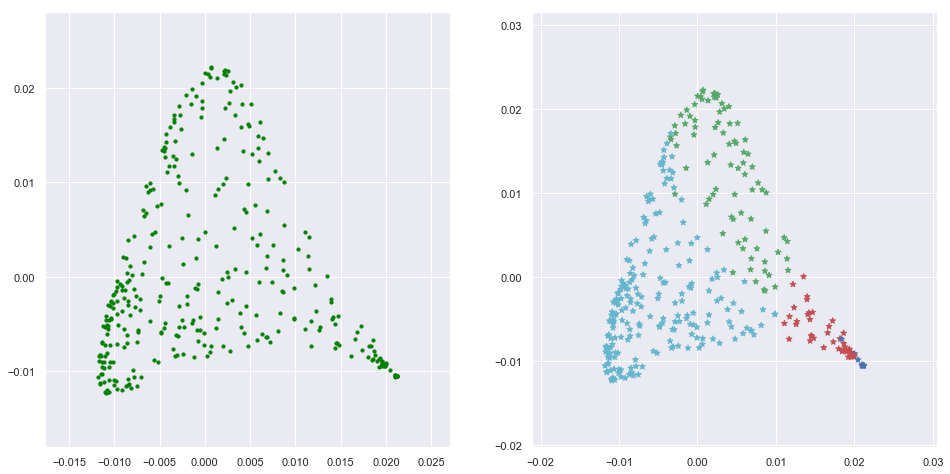

In [133]:

#----------------------------------------------------------------------
# 2D embedding of dataset
print("Computing embedding")
X_manifold = manifold.SpectralEmbedding(n_components=2).fit_transform(X)
print("Done.")

fig = plt.figure(figsize=(16, 8))
ax = fig.add_subplot(121)
ax.scatter(X_manifold [:, 0], X_manifold [:, 1],c='green', marker='o', s=10)
ax = fig.add_subplot(122)
ax.scatter(X_manifold [:, 0], X_manifold [:, 1], c=colors[kmean.labels_], marker='*')

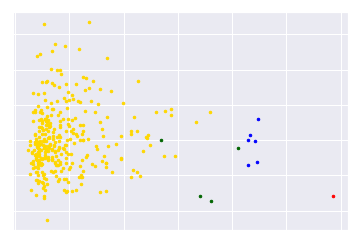

345

In [137]:
#########Cure Clustreing#######
from pyclustering.cluster import cluster_visualizer;
from pyclustering.cluster.cure import cure;
# from pyclustering.utils import read_sample;
# from pyclustering.samples.definitions import FCPS_SAMPLES;
# # Input data in following format [ [0.1, 0.5], [0.3, 0.1], ... ].
# input_data = read_sample(FCPS_SAMPLES.SAMPLE_LSUN);
# Allocate three clusters.
cure_instance = cure(list(X.values), 4);
cure_instance.process();
Cure_clusters = cure_instance.get_clusters();
# Visualize allocated clusters via PCA transform.
visualizer = cluster_visualizer();
visualizer.append_clusters(clusters, list(X_PCA));
visualizer.show();
Cure_label = np.zeros(len(X.values[:,0]))
label = 0
for clusster in Cure_clusters:
    label += 1
    for i in clusster:
        Cure_label[i] = label

data['cure_labels'] = Cure_label
len(Cure_label)

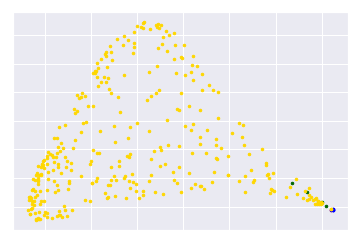

In [138]:
visualizer = cluster_visualizer();
visualizer.append_clusters(clusters, list(X_manifold));
visualizer.show();

In [139]:

from sklearn.cluster import Birch

brc = Birch(branching_factor=50, n_clusters=4, threshold=0.5, compute_labels=True)
brc.fit(X) 
# Birch(branching_factor=50, compute_labels=True, copy=True, n_clusters=None,
#    threshold=0.5)
ClusterBirch = brc.predict(X)

data['Birch_labels'] = ClusterBirch

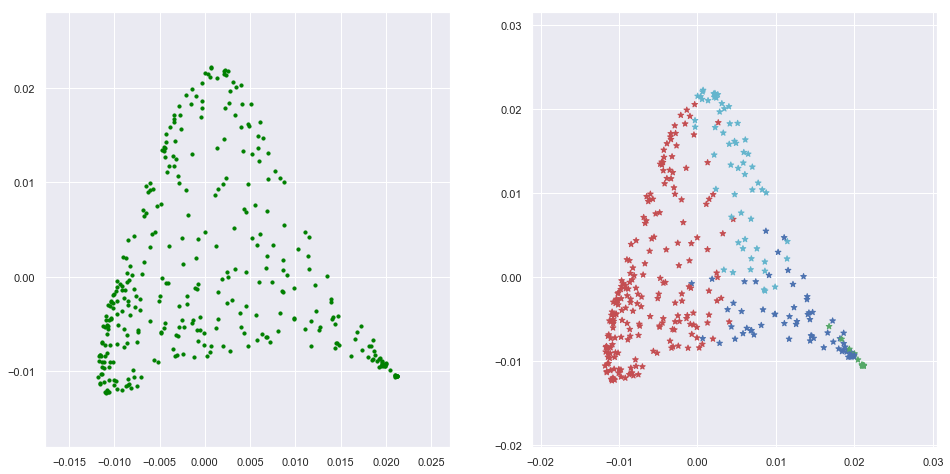

In [140]:
fig = plt.figure(figsize=(16, 8))
ax = fig.add_subplot(121)
ax.scatter(X_manifold [:, 0], X_manifold [:, 1],c='green', marker='o', s=10)
ax = fig.add_subplot(122)
ax.scatter(X_manifold [:, 0], X_manifold [:, 1], c=colors[ClusterBirch], marker='*')

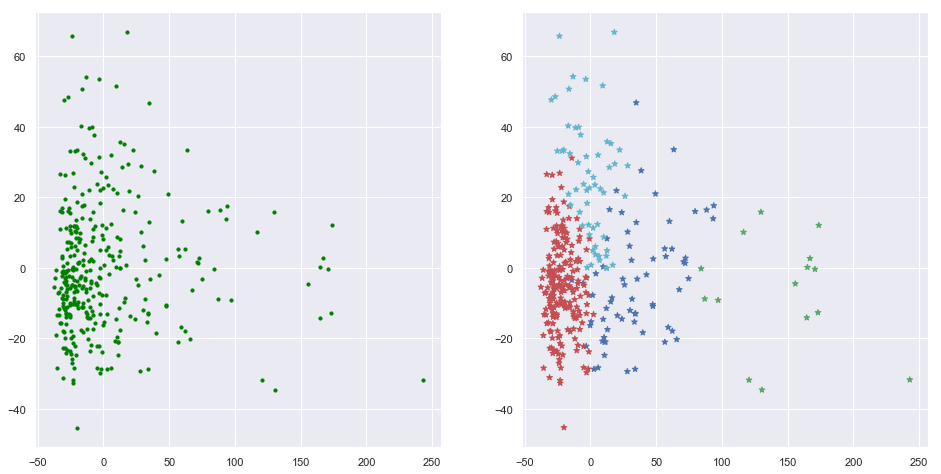

In [141]:
fig = plt.figure(figsize=(16, 8))
ax = fig.add_subplot(121)
ax.scatter(X_PCA[:, 0], X_PCA[:, 1],c='green', marker='o', s=10)
ax = fig.add_subplot(122)
ax.scatter(X_PCA[:, 0], X_PCA[:, 1], c=colors[ClusterBirch], marker='*')

In [142]:
from sklearn.cluster import AffinityPropagation
from sklearn import metrics


# #############################################################################
# Compute Affinity Propagation
af = AffinityPropagation(preference=-45000).fit(X)
cluster_centers_indices = af.cluster_centers_indices_
clusterAffinityPropagation = af.labels_

n_clusters_ = len(cluster_centers_indices)

print('Estimated number of clusters: %d' % n_clusters_)


print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels, metric='sqeuclidean'))
data['AffinityPropagation_labels'] = clusterAffinityPropagation


Estimated number of clusters: 4
Silhouette Coefficient: 0.519


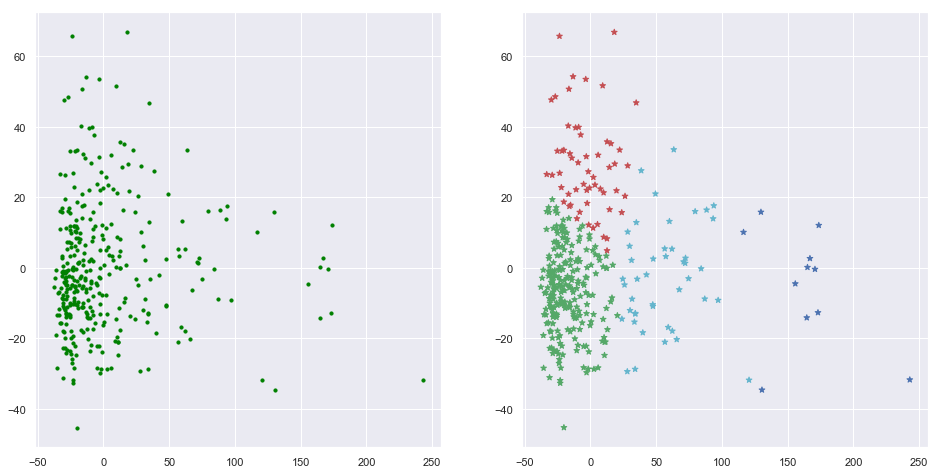

In [143]:
fig = plt.figure(figsize=(16, 8))
ax = fig.add_subplot(121)
ax.scatter(X_PCA[:, 0], X_PCA[:, 1],c='green', marker='o', s=10)
ax = fig.add_subplot(122)
ax.scatter(X_PCA[:, 0], X_PCA[:, 1], c=colors[clusterAffinityPropagation], marker='*')

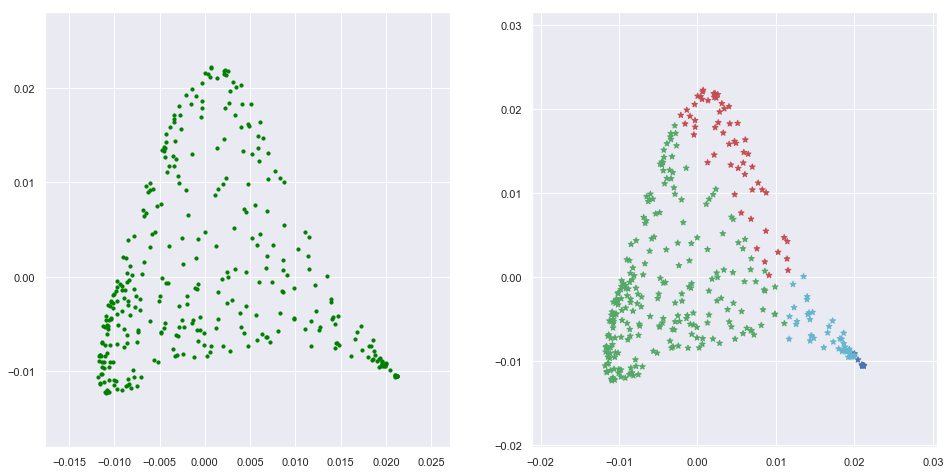

In [144]:
fig = plt.figure(figsize=(16, 8))
ax = fig.add_subplot(121)
ax.scatter(X_manifold [:, 0], X_manifold [:, 1],c='green', marker='o', s=10)
ax = fig.add_subplot(122)
ax.scatter(X_manifold [:, 0], X_manifold [:, 1], c=colors[clusterAffinityPropagation], marker='*')

In [145]:
data.to_csv('result of clustering.csv', index=False)

In [103]:
clusterAffinityPropagation

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 3, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 3, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 1, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 3, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 2, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 3, 0, 0, 0, 0,
       3, 2, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 1, 0, 3, 0, 0, 3, 1, 0, 0,
       3, 3, 3, 1, 1, 0, 1, 0, 0, 0, 0, 0, 3, 3, 3, 0, 1, 3, 0, 1, 3, 0,
       3, 0, 2, 0, 3, 3, 1, 0, 3, 3, 3, 1, 3, 2, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 3, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 3, 0, 0, 0, 0, 2, 0, 3, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 3, 1, 3, 0, 0, 1, 0, 0, 0, 0, 0, 3, 1, 0, 0,
       3, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 3, 1, 0, 0, 0, 0, 3, 0,

In [105]:

ClusterBirch

array([3, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 3, 3, 1, 1,
       1, 1, 2, 1, 1, 1, 3, 1, 1, 1, 1, 3, 1, 0, 1, 1, 3, 1, 2, 2, 3, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 3, 0, 1, 1, 1, 3, 2, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 3, 1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 3, 1, 3,
       1, 1, 1, 1, 0, 1, 1, 1, 3, 1, 2, 3, 3, 1, 3, 1, 3, 2, 1, 1, 1, 1,
       2, 0, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 3, 2, 2, 1, 1, 2, 3, 1, 1,
       2, 2, 2, 2, 3, 1, 3, 1, 1, 3, 1, 1, 2, 2, 2, 3, 3, 2, 1, 1, 0, 3,
       2, 1, 0, 2, 2, 2, 2, 1, 2, 2, 2, 3, 2, 0, 1, 1, 3, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 3, 1, 2, 3, 1, 1, 1, 1, 3, 1, 3, 3, 1, 3, 1, 3, 1, 3,
       3, 1, 1, 1, 1, 1, 3, 2, 3, 2, 1, 1, 0, 1, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 3, 2, 1, 2, 3, 1, 1, 1, 1, 1, 2, 3, 1, 1,
       2, 3, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1, 2,
       1, 1, 3, 2, 1, 1, 1, 2, 2, 2, 1, 3, 1, 0, 1,

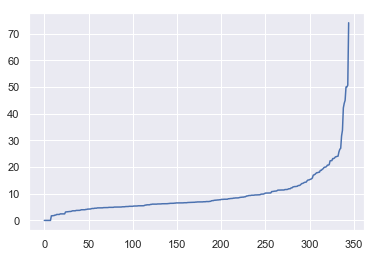

TypeError: unhashable type: 'slice'

array([-1, -1, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,
        0, -1, -1,  0, -1,  0,  0, -1,  0,  0,  0, -1,  0,  0,  0,  0, -1,
        0, -1, -1,  0,  0,  0, -1, -1, -1,  0,  0,  0,  0, -1,  0, -1,  0,
        0, -1, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0, -1,  0,  0,  0,  0, -1, -1,  0,  0,  0, -1, -1, -1,  0, -1,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0, -1, -1,  0,  0,  0, -1,
        0,  0,  0,  0,  0, -1,  0, -1, -1,  0,  0,  0, -1,  0,  0,  0, -1,
        0, -1, -1, -1,  0,  0,  0, -1, -1,  0,  0,  0,  0, -1, -1,  0,  0,
        0,  0, -1,  0,  0,  0,  0,  0,  0, -1, -1, -1,  0,  0, -1,  0,  0,
        0, -1, -1, -1, -1, -1,  0, -1,  0,  0,  0,  0,  0, -1, -1, -1, -1,
       -1, -1,  0, -1, -1, -1, -1,  0, -1, -1, -1, -1, -1,  0, -1, -1, -1,
       -1, -1, -1,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,
       -1, -1,  0,  0, -1,  0, -1,  0, -1, -1,  0, -1,  0, -1,  0, -1,  0,
        0,  0,  0,  0,  0

In [67]:
########Silhouette Coefficient
from sklearn import metrics
from sklearn.cluster import KMeans
kmeans_model = KMeans(n_clusters=3, random_state=1).fit(X)
labels = kmeans_model.labels_

KMeans_Sil = metrics.silhouette_score(X, labels, metric='euclidean')
print(KMeans_Sil)



0.3492187864800945


In [30]:



linkage = "single"
n_clusters = 4
model = AgglomerativeClustering(linkage=linkage, n_clusters=n_clusters).fit(X)
labels = model.labels_

Agglo_Sil = metrics.silhouette_score(X, labels, metric='euclidean')
print(Agglo_Sil)







################Visualisation for Agglomerative Clustering

n_samples, n_features = X_edit.shape


digits = datasets.load_digits(n_class=10)
X = digits.data
y = digits.target

# np.random.seed(0)
# def nudge_images(X, y):
#     # Having a larger dataset shows more clearly the behavior of the
#     # methods, but we multiply the size of the dataset only by 2, as the
#     # cost of the hierarchical clustering methods are strongly
#     # super-linear in n_samples
#     shift = lambda x: ndimage.shift(x.reshape((8, 8)),
#                                   .3 * np.random.normal(size=2),
#                                   mode='constant',
#                                   ).ravel()
#     X = np.concatenate([X, np.apply_along_axis(shift, 1, X)])
#     Y = np.concatenate([y, y], axis=0)
#     return X, Y
#
#
# X_edit, y = nudge_images(X_edit, y)



#----------------------------------------------------------------------
###### Visualize the clustering

def plot_clustering(X_red, labels, title=None):
    x_min, x_max = np.min(X_red, axis=0), np.max(X_red, axis=0)
    X_red = (X_red - x_min) / (x_max - x_min)

    plt.figure(figsize=(6, 4))
    for i in range(X_red.shape[0]):
        plt.text(X_red[i, 0], X_red[i, 1], str(y[i]),
                 color=plt.cm.nipy_spectral(labels[i] / 10.),
                 fontdict={'weight': 'bold', 'size': 9})

    plt.xticks([])
    plt.yticks([])
    if title is not None:
        plt.title(title, size=17)
    plt.axis('off')
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])


-0.028251777214029824


NameError: name 'X_edit' is not defined

In [ ]:
plot_clustering(X_red,labels)

In [ ]:
X_red

In [32]:

#----------------------------------------------------------------------
# 2D embedding of dataset
print("Computing embedding")
X_red = manifold.SpectralEmbedding(n_components=2).fit_transform(X)
print("Done.")


labels = []
for linkage in ('ward', 'average', 'complete', 'single'):
    clustering = AgglomerativeClustering(linkage=linkage, n_clusters=6)
    t0 = time()
    clustering.fit(X)
    print("%s :\t%.2fs" % (linkage, time() - t0))
    labels = clustering.labels_
    Agglo_Sil = metrics.silhouette_score(X, labels, metric='euclidean')
    print(Agglo_Sil)

plt.show()


1+1

Computing embedding
Done.


TypeError: 'module' object is not callable